<a href="https://colab.research.google.com/github/Eltensy/data-science-school-2025/blob/main/Data_Science_School_Wine_Dataset_Unsupervised_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN

# Loading the Data

In [ ]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Task 1 - EDA (2 points)
Perform basic Exploratory Data Analysis (EDA)
- check dataset size, columns and their datatypes
- check unique values
- check missing values, and if they are - apply some imputation strategy
- check if there some catgorical features, and if they are - apply some category encoding strategy
- check the distributions for features
- check correlation for features

size: 2314
shape: (178, 13)
columns: 
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
types: 
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


,0
alcohol,126
malic_acid,133
ash,79
alcalinity_of_ash,63
magnesium,53
total_phenols,97
flavanoids,132
nonflavanoid_phenols,39
proanthocyanins,101
color_intensity,132


,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


Categorical columns: []
Numeric columns: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


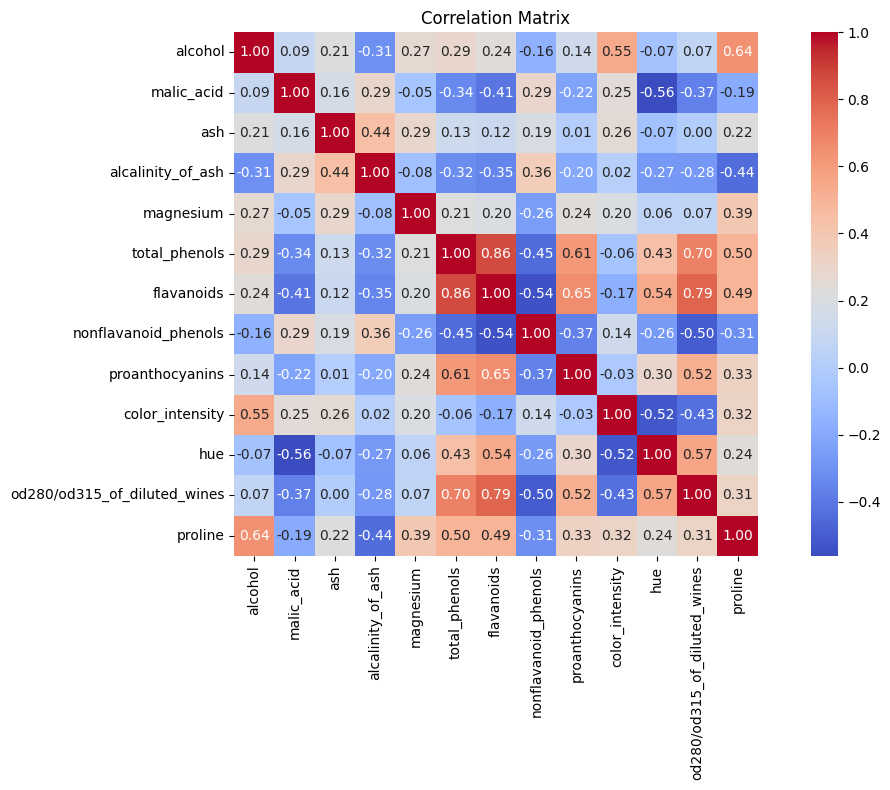

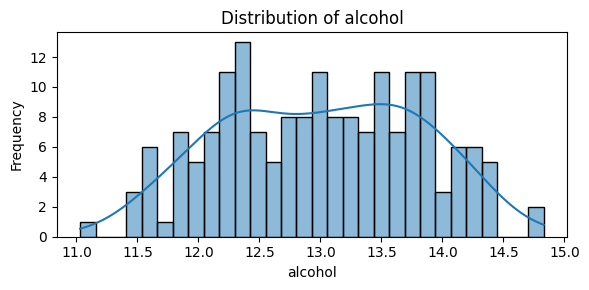

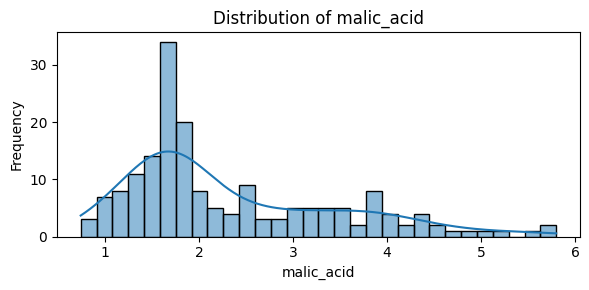

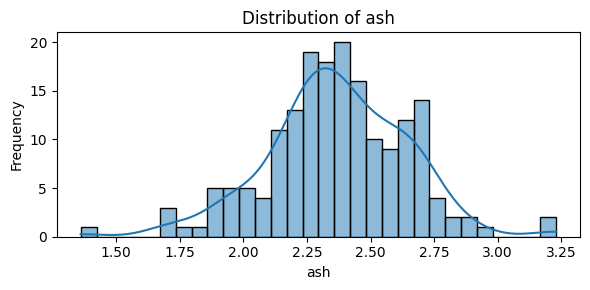

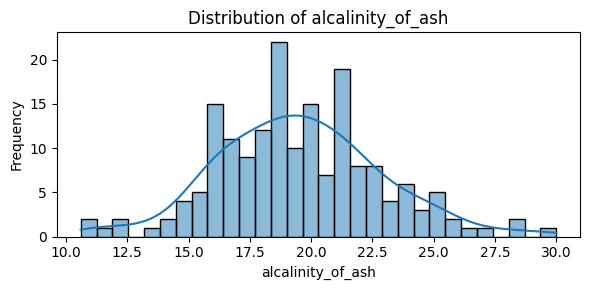

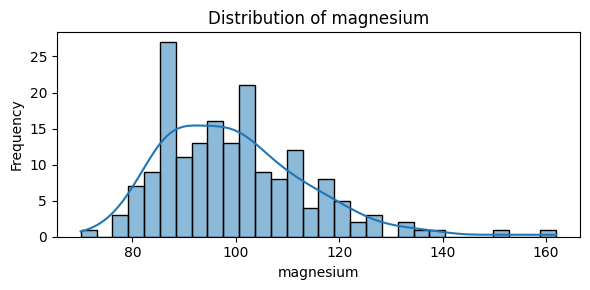

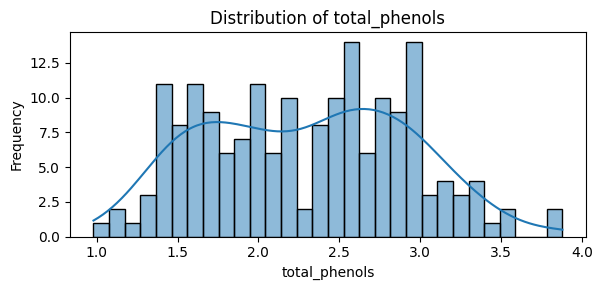

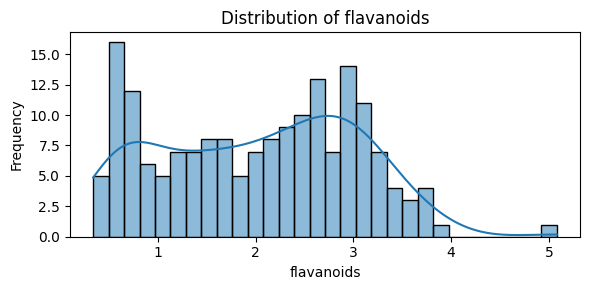

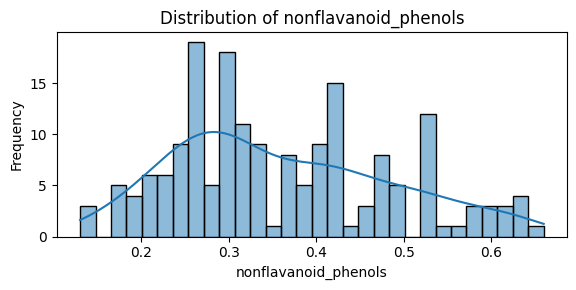

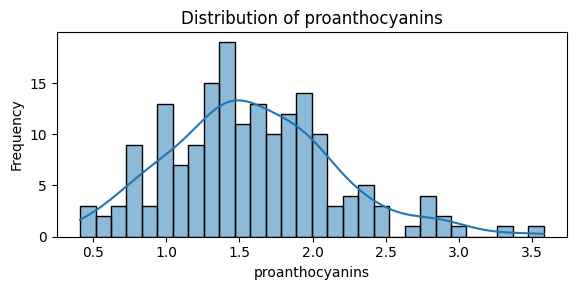

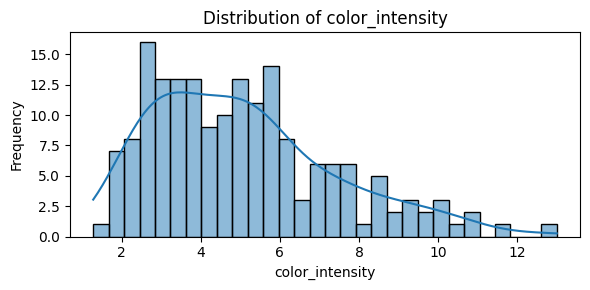

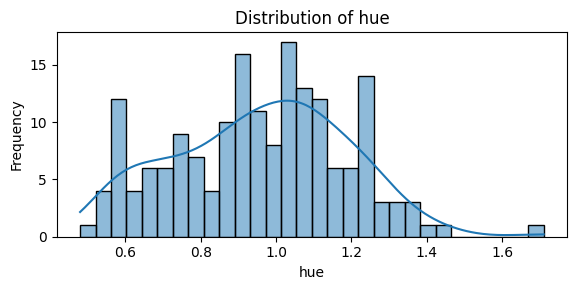

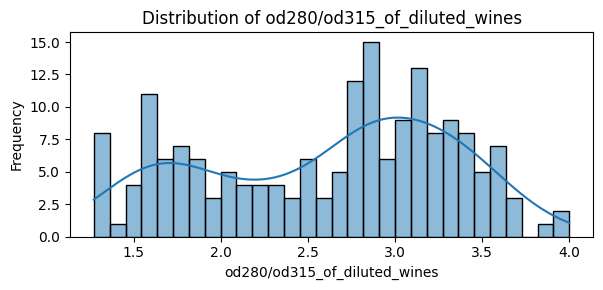

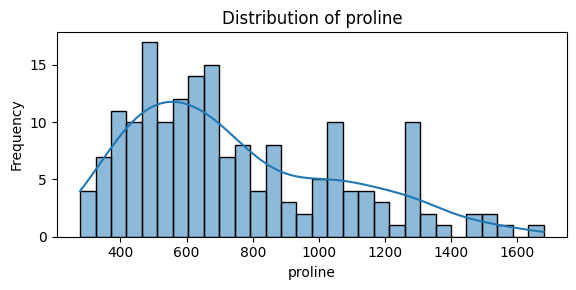

In [ ]:
print(f"size: {df.size}")
print(f"shape: {df.shape}")
print(f"columns: \n{df.columns}")
print(f"types: \n{df.dtypes}")
display(df.nunique())
display(df.isnull().sum()) # no missing data
print("Categorical columns:", list(df.select_dtypes(include=['object', 'category']).columns)) # no categorical columns
nums = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(nums)) # for distributions
df_num = df[nums]
corr_matrix = df_num.corr(method='pearson')


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix") # correlation
plt.tight_layout()
plt.show()


for col in nums: # distributions
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# Task 2 - Data Scaling (2 points)
Use sklearn StandardScaler to correctly standardise the data

In [ ]:
scaler = StandardScaler()
df[nums] = scaler.fit_transform(df[nums])
print(f"mean: \n{df[nums].mean()}")
df_normal = df[nums]
df_normal

mean: 
alcohol                         7.943708e-15
malic_acid                      3.592632e-16
ash                            -4.066660e-15
alcalinity_of_ash              -7.983626e-17
magnesium                      -7.983626e-17
total_phenols                  -3.991813e-17
flavanoids                      9.979533e-16
nonflavanoid_phenols           -5.588538e-16
proanthocyanins                -1.656602e-15
color_intensity                -3.442939e-16
hue                             1.636643e-15
od280/od315_of_diluted_wines    2.235415e-15
proline                        -1.197544e-16
dtype: float64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Task 3 - Simple KMeans flow (2 points)
Implement simple sklearn KMeans clustering algorithm with default (or some arbitrary) number of clusters and check the distribution of clusters. Don't forget to use normalized data for it

In [ ]:
k = 2
silhouette_scores_raw = []
while k < 60:
  kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
  X_scaled_test = scaler.fit_transform(df_normal)
  df_normal['cluster'] = kmeans_test.fit_predict(X_scaled_test)
  #print(f"Cluster distribution: {df_normal['cluster'].value_counts()}")
  sil_score_test = silhouette_score(df_normal, df_normal['cluster'])
  silhouette_scores_raw.append(sil_score_test)
  print(f"silhouette score for {k}: {sil_score_test}")
  k += 1



kmeans = KMeans(n_clusters=3)
X_scaled = scaler.fit_transform(df_normal)
df_normal['cluster'] = kmeans.fit_predict(X_scaled)
print(f"Cluster distribution: {df_normal['cluster'].value_counts()}")
sil_score = silhouette_score(df_normal, df_normal['cluster'])
print(f"silhouette score for 3: {sil_score}")

len(silhouette_scores_raw)

silhouette score for 2: 0.2719032411775492
silhouette score for 3: 0.30421032964694245
silhouette score for 4: 0.31347426004788204
silhouette score for 5: 0.2928313328250525
silhouette score for 6: 0.3160061517155083
silhouette score for 7: 0.345270721165862
silhouette score for 8: 0.29314419098017436
silhouette score for 9: 0.32264852590426935
silhouette score for 10: 0.25381415961180237
silhouette score for 11: 0.32146271295274353
silhouette score for 12: 0.27809108058076504
silhouette score for 13: 0.3253895021532261
silhouette score for 14: 0.3599650825018793
silhouette score for 15: 0.29301396382834555
silhouette score for 16: 0.27455882536109977
silhouette score for 17: 0.3606146991507626
silhouette score for 18: 0.3612559102744924
silhouette score for 19: 0.35949965174781584
silhouette score for 20: 0.3363694438405203
silhouette score for 21: 0.351143910654857
silhouette score for 22: 0.3675043119956131
silhouette score for 23: 0.3644544166944113
silhouette score for 24: 0.37954

58

# Task 4 - Evaluate Clustering Results (2 points)
- Check the inertia value
- Check the silhouette score
- Apply PCA to reduce dimentionality to 2D or 3D and visualize clustering results

inertia: 1454.6759876274577
silhouette score: 0.32041621459358616


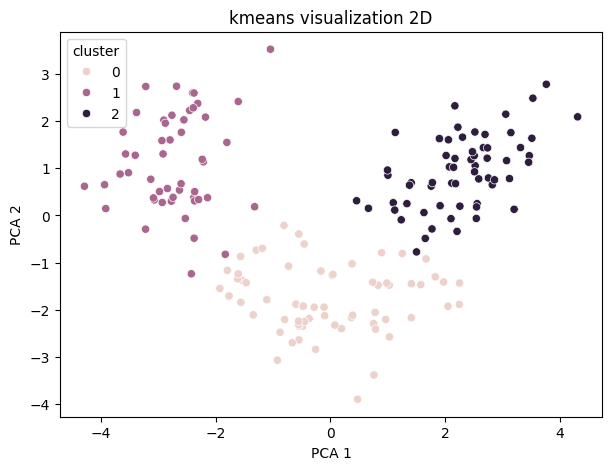

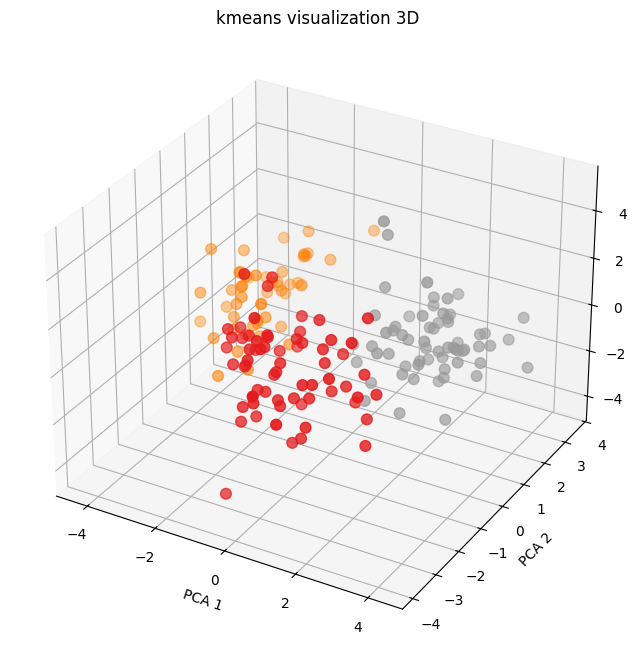

In [ ]:
print(f"inertia: {kmeans.inertia_}")

sil_score = silhouette_score(df_normal, df_normal['cluster'])
print(f"silhouette score: {sil_score}")

# 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_normal['cluster'])
plt.title("kmeans visualization 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# 3D visualization
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=df_normal['cluster'], cmap='Set1', s=60
)

ax.set_title("kmeans visualization 3D")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()


# Task 5 - Dimensionality Reduction with PCA (2 points)
- Apply PCA to normalized data
- Try different number of components and check the explained variance
- Select optimal value for number of components, fit the PCA and check the loadings for principal components

[0.35576955 0.20963577 0.10563595 0.0675087  0.06264012 0.04843981
 0.04022115 0.02547522 0.021386   0.01873851 0.01652397 0.01232396
 0.00917853 0.00652276]
[0.35576955 0.56540532 0.67104128 0.73854998 0.80119009 0.84962991
 0.88985106 0.91532627 0.93671227 0.95545078 0.97197476 0.98429871
 0.99347724 1.        ]


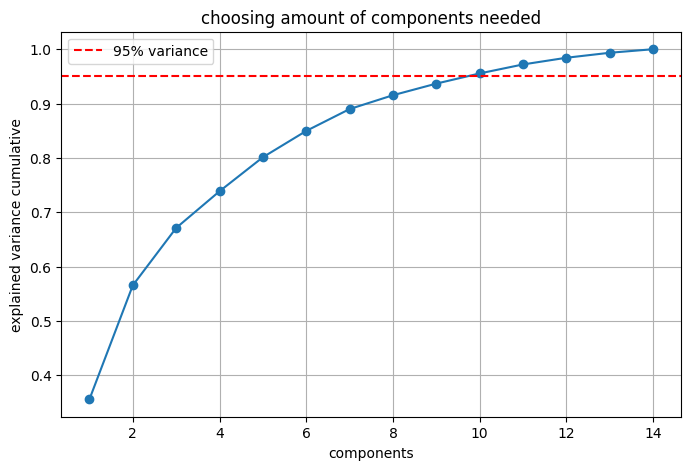

                                   PC1       PC2       PC3       PC4       PC5
alcohol                       0.184206  0.430998 -0.190851 -0.015197 -0.241151
malic_acid                   -0.219035  0.246879  0.094330  0.519736 -0.038087
ash                           0.024648  0.288198  0.633669 -0.220218 -0.117690
alcalinity_of_ash            -0.238071  0.012613  0.610199  0.059805  0.055942
magnesium                     0.162481  0.248174  0.143311 -0.269332  0.766624
total_phenols                 0.387740 -0.010060  0.153392  0.197799 -0.153198
flavanoids                    0.411280 -0.071911  0.154424  0.146838 -0.117789
nonflavanoid_phenols         -0.286968  0.077789  0.165682 -0.245310 -0.472821
proanthocyanins               0.303007 -0.032625  0.159106  0.432127  0.123236
color_intensity              -0.043712  0.493774 -0.116637  0.105307 -0.036968
hue                           0.266850 -0.297958  0.075146 -0.450496 -0.139953
od280/od315_of_diluted_wines  0.353649 -0.207447  0.

In [ ]:
pca = PCA()
pca.fit(df_normal)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(explained_variance)
print(cumulative_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel("components")
plt.ylabel("explained variance cumulative")
plt.title("choosing amount of components needed")
plt.legend()
plt.grid(True)
plt.show()

optimal_components = 5 # taken from plot info
pca_opt = PCA(n_components=optimal_components)
X_pca_opt = pca_opt.fit_transform(df_normal)

loadings = pd.DataFrame(
    pca_opt.components_.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index=df_normal.columns
)

print(loadings)

# Task 6 - Dimensionality Reduction + Clustering (2 points)
- Apply clustering to PCA-transformed data
- Check the same metrics as in previous task and visualize the results
- Select better approach (with PCA or without)

In [ ]:
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(df_normal)

silhouette_scores_pca = []
k = 2
while k < 60:
  kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
  clusters = kmeans_test.fit_predict(X_pca)
  #print(f"Cluster distribution: {df_normal['cluster'].value_counts()}")
  sil_score_test = silhouette_score(X_pca, clusters)
  silhouette_scores_pca.append(sil_score_test)
  print(f"silhouette score for {k}: {sil_score_test}")
  k += 1

silhouette score for 2: 0.3433227180088115
silhouette score for 3: 0.414249860376649
silhouette score for 4: 0.3637478827252355
silhouette score for 5: 0.3523082022436494
silhouette score for 6: 0.27714915390639255
silhouette score for 7: 0.23855269732499368
silhouette score for 8: 0.21046160514764303
silhouette score for 9: 0.22197042840955578
silhouette score for 10: 0.197872735656983
silhouette score for 11: 0.23400741096185537
silhouette score for 12: 0.21617015248994786
silhouette score for 13: 0.22243217923825187
silhouette score for 14: 0.21816361277964663
silhouette score for 15: 0.2462099053699558
silhouette score for 16: 0.22846160126538204
silhouette score for 17: 0.2136914874144396
silhouette score for 18: 0.2331964387396028
silhouette score for 19: 0.23550128922469438
silhouette score for 20: 0.23553243350585543
silhouette score for 21: 0.22971969369838166
silhouette score for 22: 0.22328520505039678
silhouette score for 23: 0.2379191419882707
silhouette score for 24: 0.22

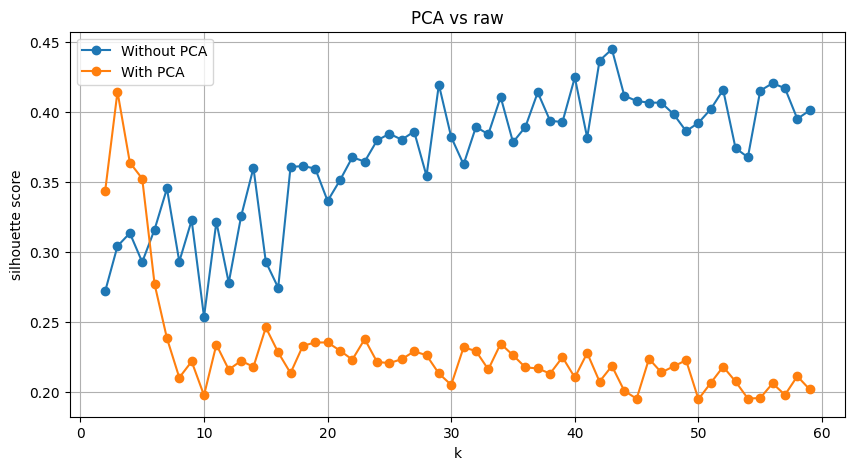

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 60), silhouette_scores_raw, label='Without PCA', marker='o')
plt.plot(range(2, 60), silhouette_scores_pca, label='With PCA', marker='o')
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.title("PCA vs raw")
plt.legend()
plt.grid(True)
plt.show()

# Task 7 - Elbow Rule (2 points)
- Use Elbow Rule to define the optimal number of clusters
- Train KMeans and check the same metrics and visualizations

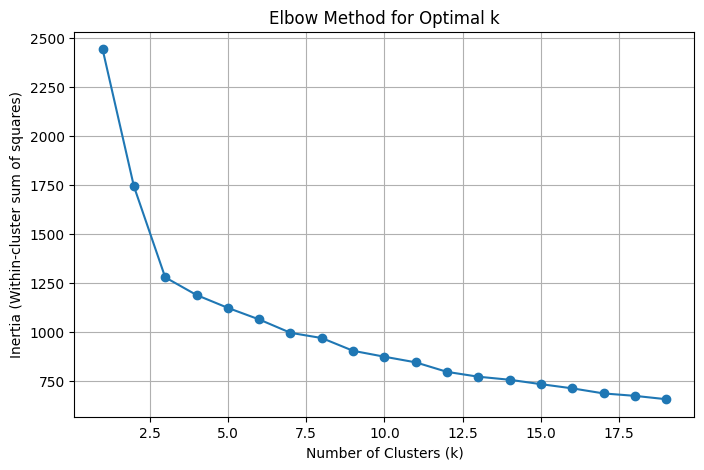

Silhouette Score for k=3: 0.26030855175871753


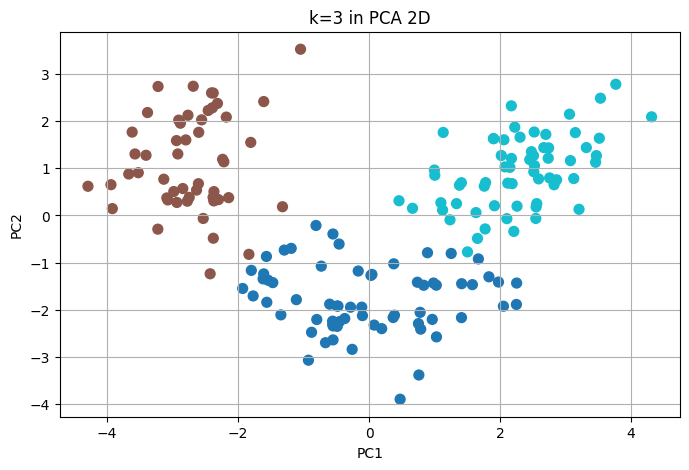

In [ ]:
inertias = []
K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normal)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

optimal_k = 3 # taken from plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for k={optimal_k}: {sil_score}")

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='tab10', s=50)
plt.title(f"k={optimal_k} in PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# Task 8 - Using Pipeline (2 points)
- Use sklearn Pipeline to combine StandardScaler + PCA + KMeans with previously defined parameters
- Fit the pipeline to the data
- Make final visualization

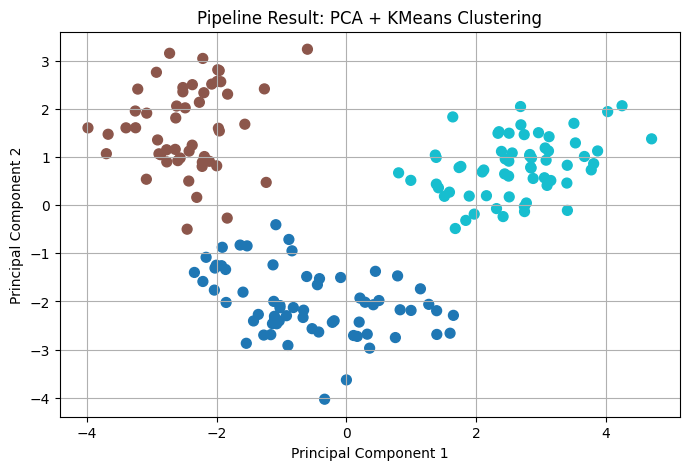

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=3, random_state=42, n_init=10))
])
pipeline.fit(df_normal)

X_pca_2d = pipeline.named_steps['pca'].transform(
    pipeline.named_steps['scaler'].transform(df_normal)
)

labels = pipeline.named_steps['kmeans'].predict(
    pipeline.named_steps['pca'].transform(
        pipeline.named_steps['scaler'].transform(df_normal)
    )
)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Pipeline Result: PCA + KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Task 9 - DBSCAN (2 points)
Try to apply sklearn DBSCAN or any other algorithm and compare the results and select the best

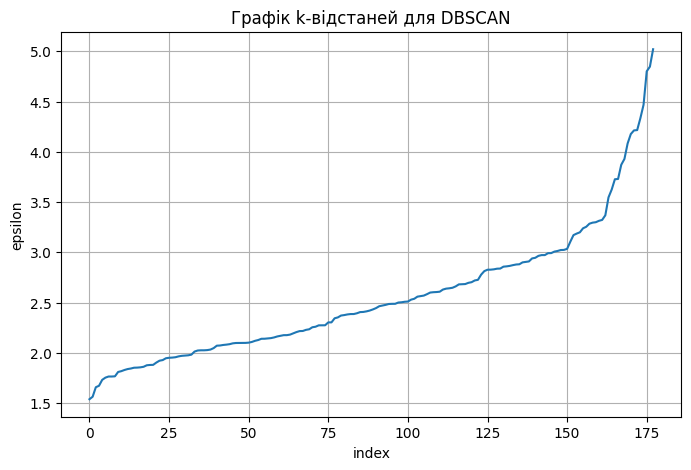

In [ ]:
# метод найближного сусіда для знаходження епсилон

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

k_distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.ylabel("epsilon")
plt.xlabel("index")
plt.title("Графік k-відстаней для DBSCAN")
plt.grid(True)
plt.show()


Кількість кластерів (без шуму): 1
Кількість шумових точок: 9
Silhouette Score (DBSCAN): 0.21737802672607306


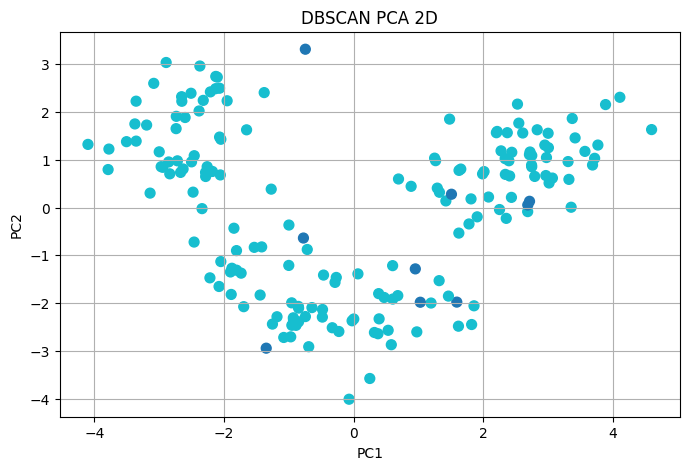

In [ ]:
dbscan = DBSCAN(eps=3.3, min_samples=5) # приблизне значення 3.3 взятий з графіку
db_labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print(f"Кількість кластерів (без шуму): {n_clusters}")
print(f"Кількість шумових точок: {n_noise}")

sil_score = silhouette_score(X_scaled, db_labels)
print(f"Silhouette Score (DBSCAN): {sil_score}")


plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', s=50)
plt.title("DBSCAN PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Task 10 - Analysis (2 points)
Perform all necessary analysis and write a few-paragraph description of clustering results

In [ ]:
#

k <= 4 - PSA показав себе краще, все що 5 і більше, на сирих даних працює краще.
Elbow метод показав себе непогано, визначив одну з найкращих k.
DBSCAN погано себе показав, незважаючи на визначення епсилон методом найближчий сусідів та звичайний перебір багатьох епсилон та мін. семплів, результати мені не сподобались дивлячись на візуалізацію.
У результаті найкраще спрацював KMeans без PCA — простий, зрозумілий і дає стабільно хороші кластери.